# 이미지 식별 머신을 위한 데이터를 준비한다.

## 필요한 라이브러리를 불러 온다.

In [1]:
# 데이터 플로팅 라이브러리

# 숫자 처리 라이브러리

# 딥러닝을 위한 파이토치 라이브러리

# 토치비전 라이브러리

# 이미지 처리 라이브러리 (PIL, pillow)

# 주피터 노트북에서 plot이 보이도록 설정
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 디렉토리, 분할 비율, 변환 방법을 설정한다.

In [2]:
# 이미지 데이터가 있는 디렉토리와 데이터 세트 분할 비율(valid_size)을 정한다.


# 이미지 데이터를 ResNet50에서 다룰 수 있도록 변환시키는 방법을 정한다. (t_transforms)
#t_transforms = transforms.Compose([
#                transforms.RandomResizedCrop(224),
#                transforms.Resize(224),
#                transforms.ToTensor()
#])
# convert image size to 224x224 for ResNet50 after crop


### (확인) 변환 방법을 출력하여 확인해 본다.

In [3]:
# 설정한 이미지 데이터 변환 방법을 출력하여 확인한다.


Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)


## 데이터를 로딩 함수를 작성한다.

### (연습) trainloader와 testloader를 만들어 본다.

#### 1. 학습 데이터 세트 및 테스트 데이터 세트의 디렉토리 및 변환 방식을 지정한다.

In [4]:
# datasets.ImageFolder를 사용해서 학습 데이터(train_data)와 테스트 데이터(test_data)를 만든다.
# make train_data and test_data using datasets.ImageFolder


# 학습 데이터의 형식을 확인한다.


# 학습 데이터와 테스트 데이터의 길이를 확인한다.



Dataset ImageFolder
    Number of datapoints: 155
    Root location: ./data
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
155 155


#### 2. 데이터세트를 섞기 위해, 우선 인덱스를 만들어 랜덤하게 섞는다.

In [5]:
# train_data 사이즈만큼의 정수값을 갖는 인덱스 리스트(indices)를 만들고 확인한다.


# 인덱스 리스트를 랜덤하게 섞고 확인한다.



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
[49, 29, 27, 45, 122, 116, 2, 74, 128, 44, 68, 4, 75, 56, 82, 22, 61, 133, 142, 139, 25, 20, 10, 90, 11, 62, 14, 23, 70, 125, 80, 51, 76, 39, 147, 111, 0, 71, 41, 69, 79, 47, 26, 106, 31, 1, 19, 8, 105, 54, 144, 154, 118, 148, 64, 102, 97, 140, 65, 150, 120, 132, 113, 15, 104, 121, 88, 17, 78, 36, 34, 141, 95, 72, 94, 119, 114, 115,

#### 3. 분할 비율(valid_size)에 따른 지점의 인덱스 값(split)을 계산한다.

In [6]:
# 분할 비율(valid_size)에 해당하는 인덱스를 계산하고 확인해 본다.


31


#### 4. split을 기준으로 학습 데이터 인덱스 리스트와 테스트 인덱스 리스트로 나눈다.

In [7]:
# 학습 데이터 인덱스 리스트 및 테스트 인덱스 리스트를 만들고 확인해 본다.



[51, 76, 39, 147, 111, 0, 71, 41, 69, 79, 47, 26, 106, 31, 1, 19, 8, 105, 54, 144, 154, 118, 148, 64, 102, 97, 140, 65, 150, 120, 132, 113, 15, 104, 121, 88, 17, 78, 36, 34, 141, 95, 72, 94, 119, 114, 115, 81, 136, 63, 43, 57, 103, 58, 91, 124, 83, 130, 55, 109, 108, 24, 21, 137, 127, 117, 86, 146, 77, 129, 123, 16, 99, 135, 84, 59, 3, 60, 50, 138, 143, 131, 18, 42, 153, 37, 145, 38, 6, 151, 67, 89, 46, 98, 40, 87, 32, 149, 92, 110, 152, 96, 126, 5, 7, 101, 66, 112, 30, 12, 52, 93, 100, 73, 13, 9, 85, 33, 48, 28, 53, 107, 35, 134]
[49, 29, 27, 45, 122, 116, 2, 74, 128, 44, 68, 4, 75, 56, 82, 22, 61, 133, 142, 139, 25, 20, 10, 90, 11, 62, 14, 23, 70, 125, 80]


#### 5. 데이터 세트들의 샘플러 및 로더를 만들고 확인한다.

In [8]:
# 데이터 샘플링 방식(SubsetRandomSampler)을 지정한다

# 데이터 로딩을 위한 loader를 만든다. (sampler, 배치 사이즈 등 지정)

# 학습 loader와 테스트 loader의 class들을 출력하여 확인한다.


['Basalt', 'Highland']
['Basalt', 'Highland']


### 코드들을 묶어서 load_split_train_test() 함수를 만든다.

In [9]:
# 위의 코드들을 묶어서 load_split_train_test() 함수를 만든다. (입력 : 데이터 디렉토리, 분할 비율) (출력 : 학습 데이터 로더, 테스트 데이터 로더)



### load_split_train_test() 함수를 이용하여 trainloader, testloader를 생성한다.

In [10]:
# load_split_train_test() 함수를 이용하여 trainloader와 testloader를 만들고 확인한다.


['Basalt', 'Highland']
['Basalt', 'Highland']


## 이미지 데이터 샘플들을 살펴본다.

### 임의의 데이터를 로딩한 후 이미지와 레이블을 반환하는 get_random_images() 함수를 만든다.

### 임의 선택한 이미지를 표시해 본다.

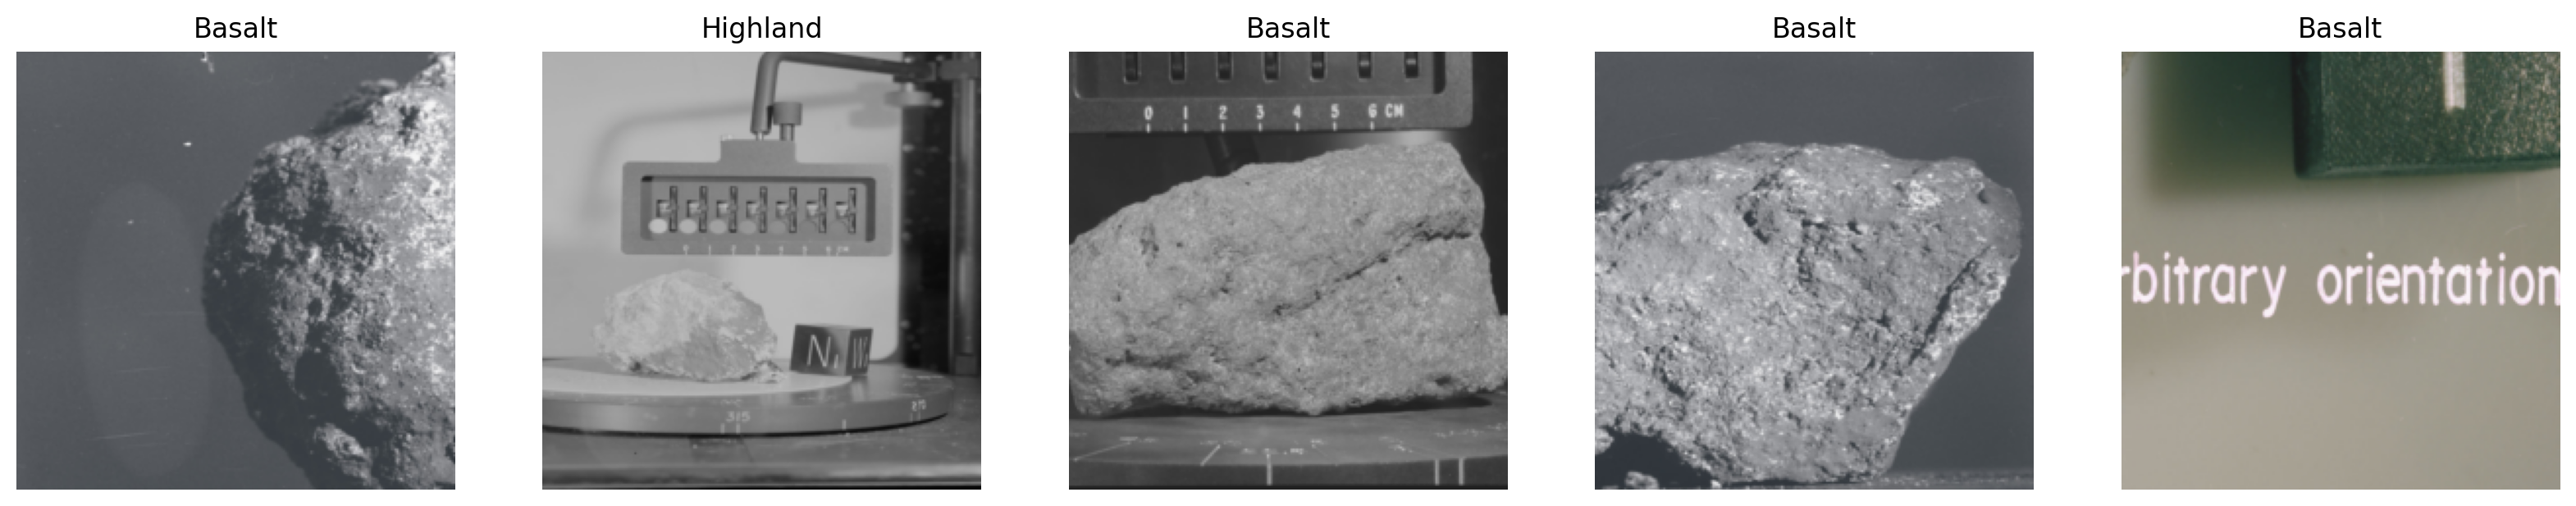

In [12]:
# 5개의 이미지와 레이블을 랜덤하게 가져온다.

# 픽셀 배열을 PIL 형식의 이미지로 변환하고 이미지 크기를 지정한다.


# 학습 데이터의 class 리스트를 얻는다.


# 이미지를 표시하기 위한 설정을 한다.


# 주피터 노트북에 이미지를 표시한다.


# ResNet50 모델을 가져와 FCL(Fully Connected Layer)을 수정한다.

## Compute device를 정한다(CPU or GPU)

In [13]:
# compute device를 정하고 확인한다.


cpu


## 사전학습된 ResNet50 모델을 지정한다.

In [14]:
# resnet50 모델을 pretrained=True로 설정한다.


/home/codespace/.python/current/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### (확인) 수정 전의 ResNet50 모델을 확인해 본다. 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## FCL을 수정한다.(뉴런 구축, 신경망 연결, FCL의 layer 설정 등)

In [16]:
# 모든 신경망 구축 : 전이학습을 위해 모델의 가중치를 freeze 한다.
    
# 뉴런들을 연결하여 신경망을 생성한다.


# q: explain the above code
# a: 2048개의 입력을 받아 512개의 출력을 내고, ReLU 함수를 거쳐 0.2의 확률로 Dropout을 적용한다.
# 512개의 입력을 받아 2개의 출력을 내고, LogSoftmax 함수를 거쳐 1차원으로 변환한다.
# 1차원으로 변환된 출력을 갖는 신경망을 생성한다.

# 손실함수를 Cross entropy loss 함수로 지정한다.

# why
# optimizer를 Adam으로 지정한다.
# what is Adam
#

# 신경망을 compute device로 보낸다.

# 종료 여부를 출력한다.



done!


### (확인) FCL을 확인해 본다.

Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=512, out_features=2, bias=True)
  (4): LogSoftmax(dim=1)
)


# 모델의 FCL을 학습시키고 테스트 한다.

## 모델 학습/검증을 위한 변수를 설정한다.

In [18]:
# 에폭 및 출력 간격을 설정한다.

# 손실 변수들을 초기화 한다.

# 현재의 학습 단계를 표현하는 steps 변수를 0으로 초기화 한다.



## 설정한 에폭만큼 모델을 학습시키며 검증/평가 한다.

In [19]:
# 설정한 회수만큼 학습 후 테스트 및 평가해 본다.


Training step  1
Training step  2
Training step  3
Training step  4
Training step  5
Epoch 1/10:  Train loss: 3.523..  Test loss: 0.896..  Test accuracy: 0.450

Training step  6
Training step  7
Training step  8
Training step  9
Training step  10
Epoch 2/10:  Train loss: 0.944..  Test loss: 0.938..  Test accuracy: 0.554

Training step  11
Training step  12
Training step  13
Training step  14
Training step  15
Epoch 3/10:  Train loss: 0.975..  Test loss: 0.776..  Test accuracy: 0.454

Training step  16
Training step  17
Training step  18
Training step  19
Training step  20
Epoch 4/10:  Train loss: 0.656..  Test loss: 0.566..  Test accuracy: 0.710

Training step  21
Training step  22
Training step  23
Training step  24
Training step  25
Epoch 5/10:  Train loss: 0.639..  Test loss: 0.507..  Test accuracy: 0.773

Training step  26
Training step  27
Training step  28
Training step  29
Training step  30
Epoch 6/10:  Train loss: 0.342..  Test loss: 0.431..  Test accuracy: 0.804

Training step

### (확인) 학습 손실값과 테스트 손실값을 그래프로 확인한다.

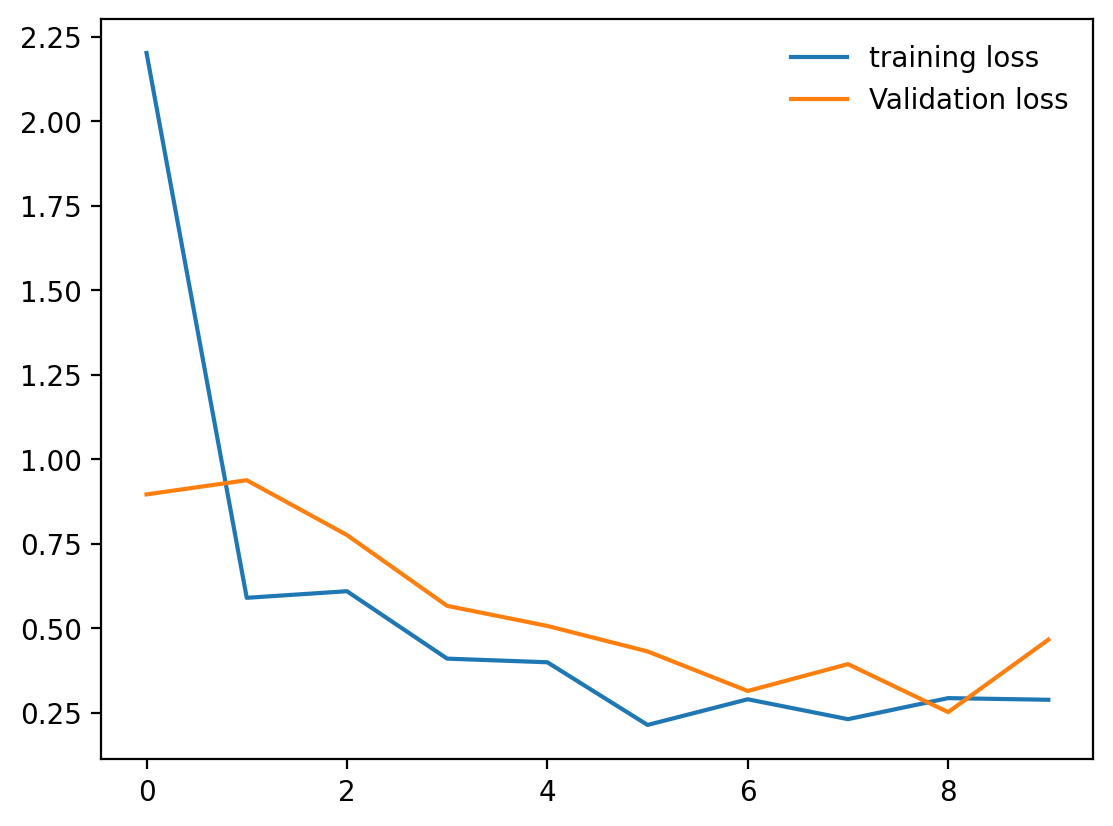

In [20]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# in this graph, what is x-axis? y-axis?
# x-axis: epoch
# y-axis: loss

# 학습/테스트 완료된 모델을 저장한다.

In [21]:
# 추후 로드하여 사용할 수 있도록 학습/테스트 완료된 모델을 저장한다.


# 완성된 모델을 사용하여 예측한다.

## 저장한 모델을 불러온다.

In [22]:
# 저장한 모델을 불러온다.


### (확인) 불러온 모델을 확인해 본다.

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 이미지 예측을 위해 predict_image() 함수를 만든다.

## 5개의 이미지를 임의로 가져와 예측해 본다.

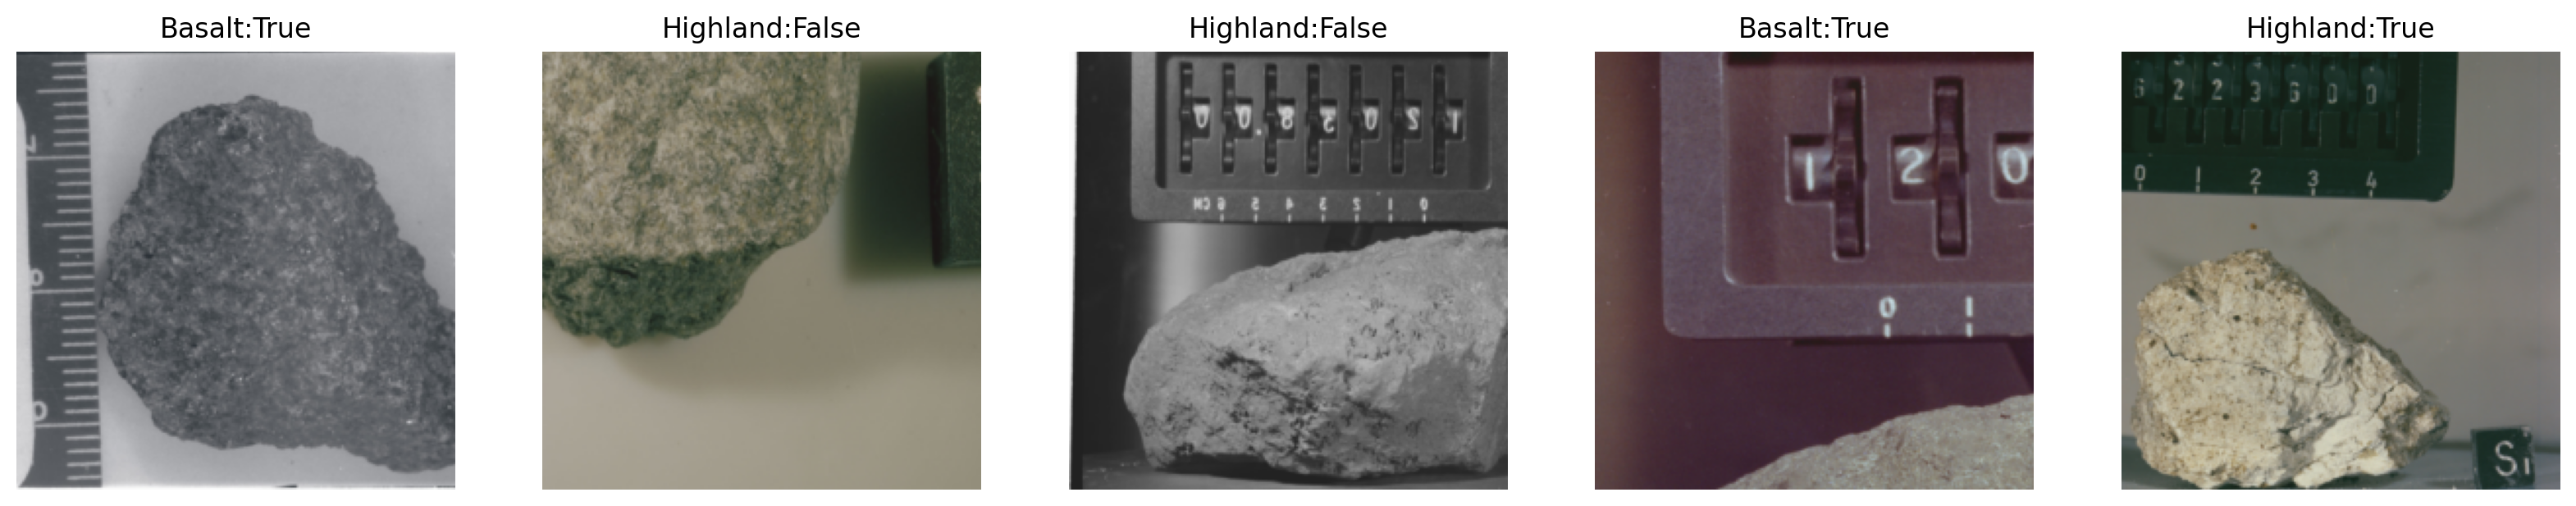